In [1]:
!pip install opendatasets
!pip install albumentations

# Import libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sb
import opendatasets as od
import os
import cv2
import xml.etree.ElementTree as ET
import matplotlib.patches as patches
from sklearn.model_selection import train_test_split
import albumentations as A
from albumentations.pytorch import ToTensorV2

/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.24 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [2]:


# Download dataset
od.download("https://www.kaggle.com/datasets/akhatova/pcb-defects/data")
#{"username":"shehansudeepaperera","key":"8c0dc841d961915fcec4c00ba93bbc06"}


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: shehansudeepaperera
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/akhatova/pcb-defects


100%|██████████| 1.88G/1.88G [01:33<00:00, 21.4MB/s]


## Some testing with dataset.
this steps are not important for model training process.

In [ ]:
#Missing hole dataset
annotations_path="/content/pcb-defects/PCB_DATASET/Annotations/Missing_hole"
images_path = "/content/pcb-defects/PCB_DATASET/images/Missing_hole"


def parse_annotation(annotations_folder):
  img_names = []
  all_bboxes = []
  for xml_file in os.listdir(annotations_folder):
    if xml_file.endswith('.xml'):
      tree = ET.parse(os.path.join(annotations_folder, xml_file))
      root = tree.getroot()
     #print('xml detect') //added for debugging
      image_name = root.find('filename').text
      bboxes = []
      for obj in root.findall('object'):
        bbox = obj.find('bndbox')
        xmin = int(bbox.find('xmin').text)
        ymin = int(bbox.find('ymin').text)
        xmax = int(bbox.find('xmax').text)
        ymax = int(bbox.find('ymax').text)
        bboxes.append([xmin, ymin, xmax, ymax])
      img_names.append(image_name)
      all_bboxes.append(bboxes)
  return img_names, all_bboxes


In [ ]:
img_names,bboxes = parse_annotation(annotations_path)
print(img_names)
print(bboxes)


['01_missing_hole_15.jpg', '06_missing_hole_08.jpg', '01_missing_hole_04.jpg', '06_missing_hole_07.jpg', '04_missing_hole_14.jpg', '08_missing_hole_02.jpg', '07_missing_hole_08.jpg', '05_missing_hole_09.jpg', '04_missing_hole_08.jpg', '09_missing_hole_05.jpg', '01_missing_hole_03.jpg', '09_missing_hole_02.jpg', '07_missing_hole_01.jpg', '01_missing_hole_19.jpg', '09_missing_hole_09.jpg', '01_missing_hole_12.jpg', '06_missing_hole_10.jpg', '07_missing_hole_09.jpg', '08_missing_hole_10.jpg', '05_missing_hole_10.jpg', '05_missing_hole_02.jpg', '10_missing_hole_05.jpg', '10_missing_hole_02.jpg', '11_missing_hole_07.jpg', '04_missing_hole_05.jpg', '05_missing_hole_01.jpg', '09_missing_hole_01.jpg', '01_missing_hole_14.jpg', '11_missing_hole_05.jpg', '12_missing_hole_08.jpg', '01_missing_hole_13.jpg', '07_missing_hole_04.jpg', '11_missing_hole_03.jpg', '06_missing_hole_01.jpg', '10_missing_hole_01.jpg', '12_missing_hole_04.jpg', '04_missing_hole_19.jpg', '05_missing_hole_07.jpg', '08_missing

In [ ]:
def prepare_dataset(images_path, img_names, all_bboxes):
    dataset = []

    for img_name, bboxes in zip(img_names, all_bboxes):
        # Construct the full image path based on image folder
        image_path = os.path.join(images_path, img_name)

        # Ensure the image exists
        if os.path.exists(image_path):
            dataset.append({'image_path': image_path, 'bboxes': bboxes})
        else:
            print(f"Image file not found: {image_path}")  # Debug for missing images

    return dataset


In [ ]:
dataset = prepare_dataset(images_path, img_names, bboxes)
print("dataset",dataset[:2])

dataset [{'image_path': '/content/pcb-defects/PCB_DATASET/images/Missing_hole/01_missing_hole_15.jpg', 'bboxes': [[2075, 1034, 2139, 1087], [2470, 1105, 2526, 1158], [2077, 514, 2135, 572]]}, {'image_path': '/content/pcb-defects/PCB_DATASET/images/Missing_hole/06_missing_hole_08.jpg', 'bboxes': [[1442, 1149, 1498, 1205], [1093, 1149, 1159, 1212], [1010, 849, 1074, 915], [857, 197, 913, 253], [243, 1164, 315, 1222]]}]


In [ ]:
#Visualization of data
def visualize_data(dataset,num_images=5):
  for i in range(min(num_images,len(dataset))):
   image = cv2.imread(dataset[i]['image_path'])
   image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

   fig,ax = plt.subplots(1,figsize=(10,10))
   ax.imshow(image)

   for bbox in dataset[i]['bboxes']:
     xmin,ymin,xmax,ymax = bbox
     width = xmax-xmin
     height = ymax-ymin

     rect = patches.Rectangle((xmin,ymin),width,height,linewidth=2,edgecolor='r',facecolor='none')
     ax.add_patch(rect)

  plt.title(f"Image{i+1}-{dataset[i]['image_path']}")
  plt.show()

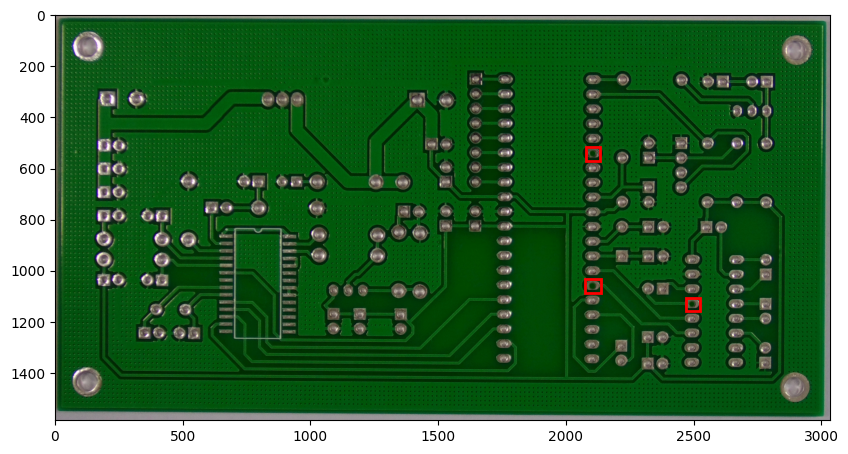

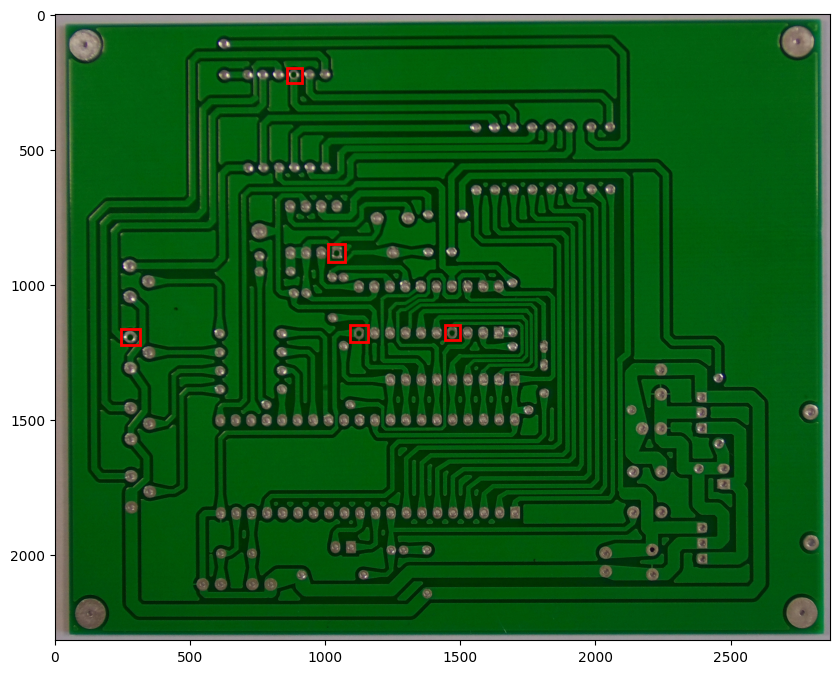

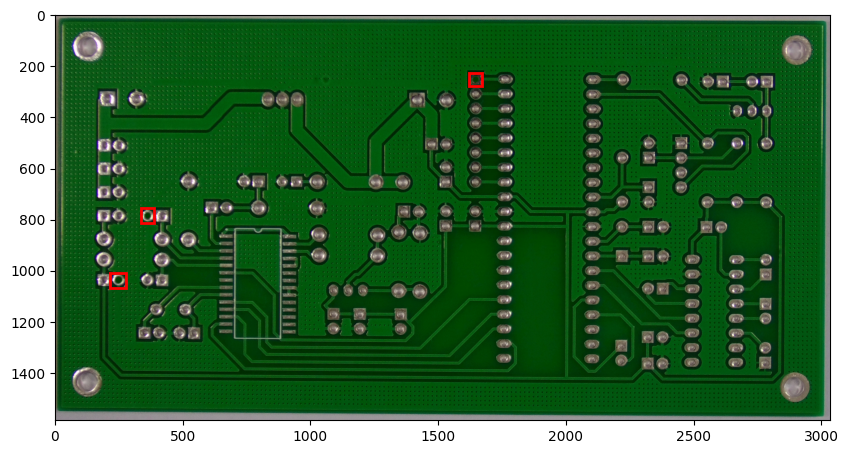

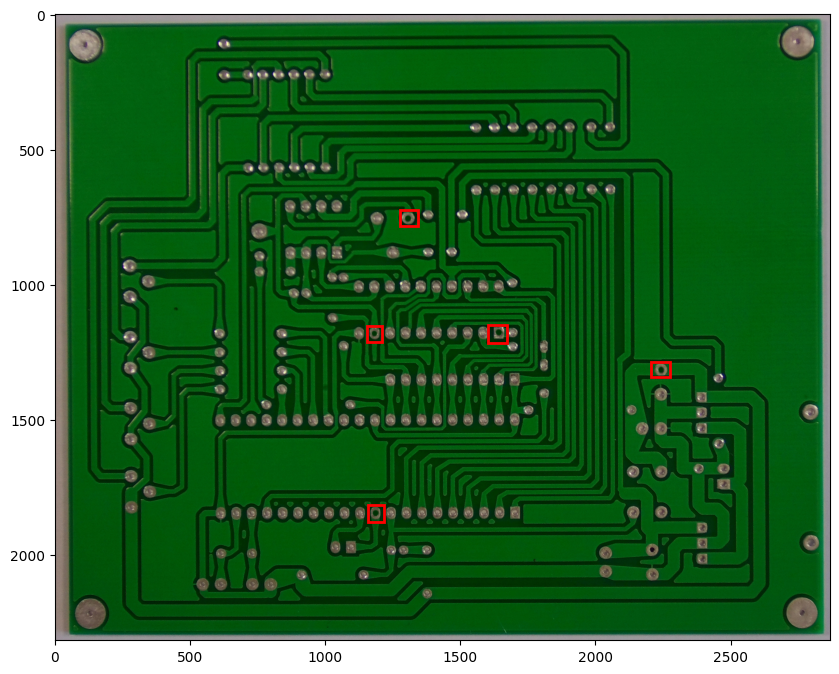

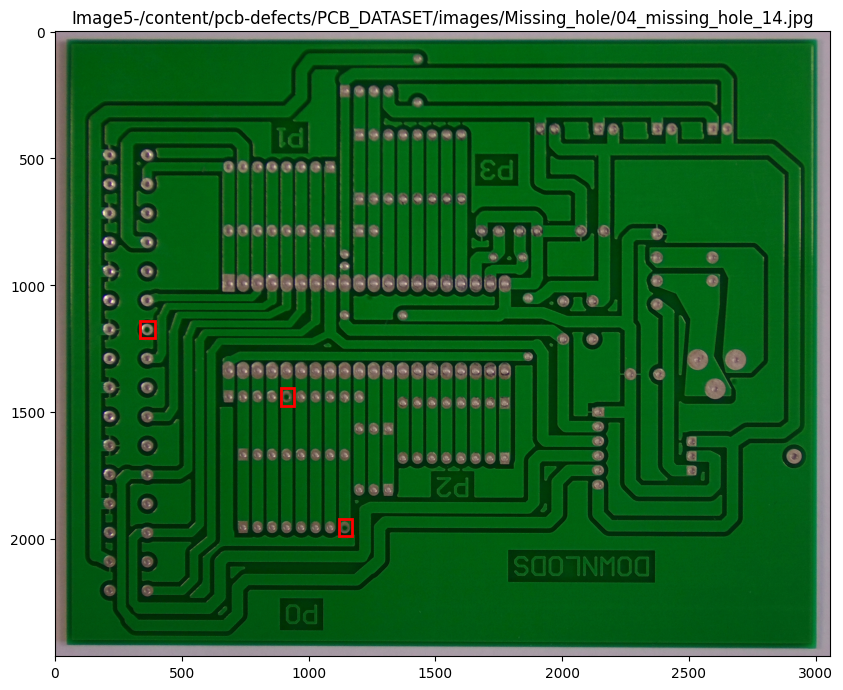

In [ ]:
visualize_data(dataset)

## Split the dataset

In [ ]:


def split_dataset(dataset, test_size=0.2, random_seed=42):
    # Split the dataset into training and validation sets
    train_set, val_set = train_test_split(dataset, test_size=test_size, random_state=random_seed)

    return train_set, val_set

train_set, val_set = split_dataset(dataset, test_size=0.2)

# Verify the split (e.g., check the number of images in each set)
print(f"Number of training images: {len(train_set)}")
print(f"Number of validation images: {len(val_set)}")

Number of training images: 92
Number of validation images: 23


## Advance data augmentation
For learning data augmentation

In [ ]:
def advanced_augmentation(image, bboxes):
    transform = A.Compose([
        A.HorizontalFlip(p=0.5),  # Random horizontal flip
        A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5),  # Random brightness/contrast
        A.Rotate(limit=45, p=0.7),  # Random rotation between -45 to 45 degrees
        A.RandomSizedBBoxSafeCrop(width=600, height=600, p=1.0),  # Random crop keeping all boxes intact
        A.RandomScale(scale_limit=0.1, p=0.5),  # Random scaling
        A.CLAHE(clip_limit=2.0, tile_grid_size=(8, 8), p=0.5),  # CLAHE (Contrast Limited Adaptive Histogram Equalization)
        A.GaussianBlur(blur_limit=3, p=0.2),  # Random Gaussian blur (ensure valid blur limit)
        A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225), p=1.0),  # Normalization
        ToTensorV2(p=1.0)  # Convert image to tensor
    ], bbox_params=A.BboxParams(format='pascal_voc', label_fields=['category_ids']))

    augmented = transform(image=image, bboxes=bboxes, category_ids=[0] * len(bboxes))  # 0 for single class
    return augmented['image'], augmented['bboxes']

In [ ]:
def apply_augmentation_to_dataset(dataset):
    augmented_dataset = []

    for data in dataset:
        image = cv2.imread(data['image_path'])
        #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        bboxes = data['bboxes']

        # Apply advanced augmentation
        augmented_image, augmented_bboxes = advanced_augmentation(image, bboxes)

        augmented_dataset.append({'image': augmented_image, 'bboxes': augmented_bboxes})

    return augmented_dataset

In [ ]:
augmented_train_set = apply_augmentation_to_dataset(train_set)

# Verify the augmented dataset
print(f"Augmented dataset size: {len(augmented_train_set)}")


/usr/local/lib/python3.10/dist-packages/pydantic/main.py:214: UserWarning: blur_limit and sigma_limit minimum value can not be both equal to 0. blur_limit minimum value changed to 3.
  validated_self = self.__pydantic_validator__.validate_python(data, self_instance=self)


Augmented dataset size: 92


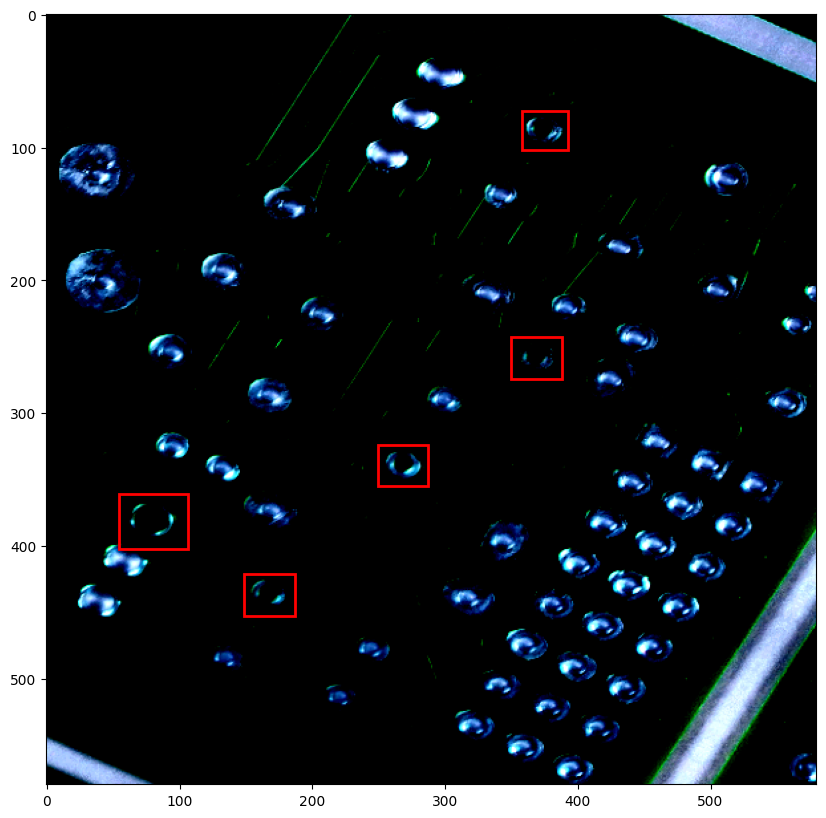

In [ ]:
############## This is for just see how augmented data are.##############
def visualize_augmented_image(image, bboxes):
    fig, ax = plt.subplots(1, figsize=(10, 10))

    # Transpose the image to move the channels to the last dimension (H, W, C)
    image = image.permute(1, 2, 0)  # Change to (558, 558, 3)

    ax.imshow(image)

    # Draw bounding boxes on the image
    for bbox in bboxes:
        xmin, ymin, xmax, ymax = bbox
        width = xmax - xmin
        height = ymax - ymin
        rect = patches.Rectangle((xmin, ymin), width, height, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

    plt.show()

# Example: Visualizing an augmented image
augmented_image, augmented_bboxes = advanced_augmentation(cv2.imread(train_set[13]['image_path']), train_set[13]['bboxes'])
visualize_augmented_image(augmented_image, augmented_bboxes)

# Model Training
Start actual training process

In [ ]:
############## copy all images and annotation data in to new location
import os
import shutil

# Define paths
image_dir = "/content/pcb-defects/PCB_DATASET/images"
destination_dir = "/content/labels"

# Create destination directory if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)

# Walk through all subdirectories in the image directory
for root, _, files in os.walk(image_dir):
    for file in files:
        if file.endswith(".jpg"):  # Process only image files
            # Full path to the image file
            image_path = os.path.join(root, file)

            # Destination path in the labels folder
            destination_path = os.path.join(destination_dir, file)

            # Copy the image to the labels folder
            shutil.copy(image_path, destination_path)

print(f"All images have been copied to: {destination_dir}")


All images have been copied to: /content/labels


In [ ]:
#####################Read xml file and save them as text files#####################

# Convert XML annotations to YOLO format
def parse_annotation_to_yolo(xml_file, class_map, image_folder,class_name):
    tree = ET.parse(xml_file)
    root = tree.getroot()

    # Get image name (without extension)
    image_name = os.path.splitext(os.path.basename(xml_file))[0]
    print('image name: ',image_name)


    image_path = os.path.join(image_folder,f"{image_name}.jpg")
    #print('image path: ',image_path)
    image = cv2.imread(image_path)
    h, w, _ = image.shape

    yolo_bboxes = []

    for obj in root.findall('object'):
        class_name = obj.find('name').text
        class_id = class_map.get(class_name, None)

        if class_id is not None:
            # Extract the bounding box details
            bbox = obj.find('bndbox')
            xmin = int(bbox.find('xmin').text)
            ymin = int(bbox.find('ymin').text)
            xmax = int(bbox.find('xmax').text)
            ymax = int(bbox.find('ymax').text)

            # Convert bounding box to YOLO format (normalized)
            x_center = (xmin + xmax) / 2.0 / w
            y_center = (ymin + ymax) / 2.0 / h
            width = (xmax - xmin) / w
            height = (ymax - ymin) / h

            yolo_bboxes.append([class_id, x_center, y_center, width, height])

    return image_path, yolo_bboxes

def convert_annotations_to_yolo(annotation_folder, image_folder, class_map, label_folder):
    """
    Convert XML annotations from all classes to YOLO format and save as .txt files.
    """
    if not os.path.exists(label_folder):
        os.makedirs(label_folder)

    for class_name in os.listdir(annotation_folder):
        class_folder = os.path.join(annotation_folder, class_name)
        print('class name: ',class_name)
        for xml_file in os.listdir(class_folder):
            if xml_file.endswith('.xml'):
                xml_file_path = os.path.join(class_folder, xml_file)
                image_path, yolo_bboxes = parse_annotation_to_yolo(xml_file_path, class_map, image_folder,class_name)
                print('yolo boxes: ',yolo_bboxes)
                # Save YOLO format labels to .txt file
                label_file_name = os.path.splitext(os.path.basename(image_path))[0] + '.txt'
                label_file_path = os.path.join(label_folder, label_file_name)

                with open(label_file_path, 'w') as label_file:
                    for bbox in yolo_bboxes:
                        label_file.write(' '.join(map(str, bbox)) + '\n')
                        print(f"{label_file_name} saved")

# Class map for your 6 classes
class_map = {
    'mouse_bite': 0,
    'missing_hole': 1,
    'short': 2,
    'spur': 3,
    'open_circuit': 4,
    'spurious_copper': 5
}

annotation_folder = '/content/pcb-defects/PCB_DATASET/Annotations'
image_folder = '/content/labels'
label_folder = '/content/labels'

# Convert annotations
convert_annotations_to_yolo(annotation_folder, image_folder, class_map, label_folder)


class name:  Spur
image name:  06_spur_06
yolo boxes:  [[3, 0.7207112970711297, 0.38212435233160624, 0.016736401673640166, 0.05267702936096719], [3, 0.4478730822873082, 0.17638169257340242, 0.033124128312412834, 0.019430051813471502], [3, 0.37203626220362623, 0.1973229706390328, 0.03417015341701534, 0.019861830742659757], [3, 0.3359483960948396, 0.5744818652849741, 0.014295676429567642, 0.03929188255613126], [3, 0.12081589958158996, 0.3173575129533679, 0.033124128312412834, 0.018134715025906734]]
06_spur_06.txt saved
06_spur_06.txt saved
06_spur_06.txt saved
06_spur_06.txt saved
06_spur_06.txt saved
image name:  10_spur_04
yolo boxes:  [[3, 0.5274553571428572, 0.37896825396825395, 0.048660714285714286, 0.044642857142857144], [3, 0.48325892857142855, 0.5419146825396826, 0.03616071428571429, 0.05704365079365079], [3, 0.7743303571428571, 0.2976190476190476, 0.046875, 0.04365079365079365], [3, 0.6924107142857143, 0.6641865079365079, 0.030357142857142857, 0.04861111111111111], [3, 0.4506696

In [ ]:
def prepare_train_val_lists(label_folder, image_folder):
    image_paths = []
    label_paths = []


    for image_file in os.listdir(label_folder):
        if image_file.endswith('.jpg'):
            image_path = os.path.join(label_folder, image_file)
            label_file_name = os.path.splitext(image_file)[0] + '.txt'
            label_path = os.path.join(label_folder, label_file_name)

            image_paths.append(image_path)
            label_paths.append(label_path)


    return image_paths, label_paths

# Prepare image and label paths
image_paths, label_paths = prepare_train_val_lists(label_folder, image_folder)
print('image path',image_paths)
print('label path',label_paths)

image path ['/content/labels/09_spur_08.jpg', '/content/labels/07_missing_hole_06.jpg', '/content/labels/01_open_circuit_11.jpg', '/content/labels/04_spurious_copper_20.jpg', '/content/labels/04_spur_13.jpg', '/content/labels/07_mouse_bite_05.jpg', '/content/labels/06_missing_hole_02.jpg', '/content/labels/01_open_circuit_01.jpg', '/content/labels/12_short_01.jpg', '/content/labels/01_open_circuit_18.jpg', '/content/labels/05_mouse_bite_03.jpg', '/content/labels/01_open_circuit_04.jpg', '/content/labels/04_spurious_copper_17.jpg', '/content/labels/04_mouse_bite_16.jpg', '/content/labels/06_spurious_copper_04.jpg', '/content/labels/07_short_04.jpg', '/content/labels/07_missing_hole_04.jpg', '/content/labels/04_spurious_copper_07.jpg', '/content/labels/11_missing_hole_03.jpg', '/content/labels/07_mouse_bite_06.jpg', '/content/labels/05_spurious_copper_03.jpg', '/content/labels/12_spur_05.jpg', '/content/labels/08_missing_hole_02.jpg', '/content/labels/12_open_circuit_06.jpg', '/content/l

In [ ]:
import os
print(os.getcwd())
import os
os.chdir('/content')  # Replace '/content/my_data' with your preferred path

/content


In [ ]:
from sklearn.model_selection import train_test_split

# Split dataset into training and validation
train_images, val_images = train_test_split(image_paths, test_size=0.2, random_state=42)

# Write train.txt and val.txt
with open('train.txt', 'w') as train_file:
    train_file.write('\n'.join(train_images))

with open('val.txt', 'w') as val_file:
    val_file.write('\n'.join(val_images))


height 2530
width 2529


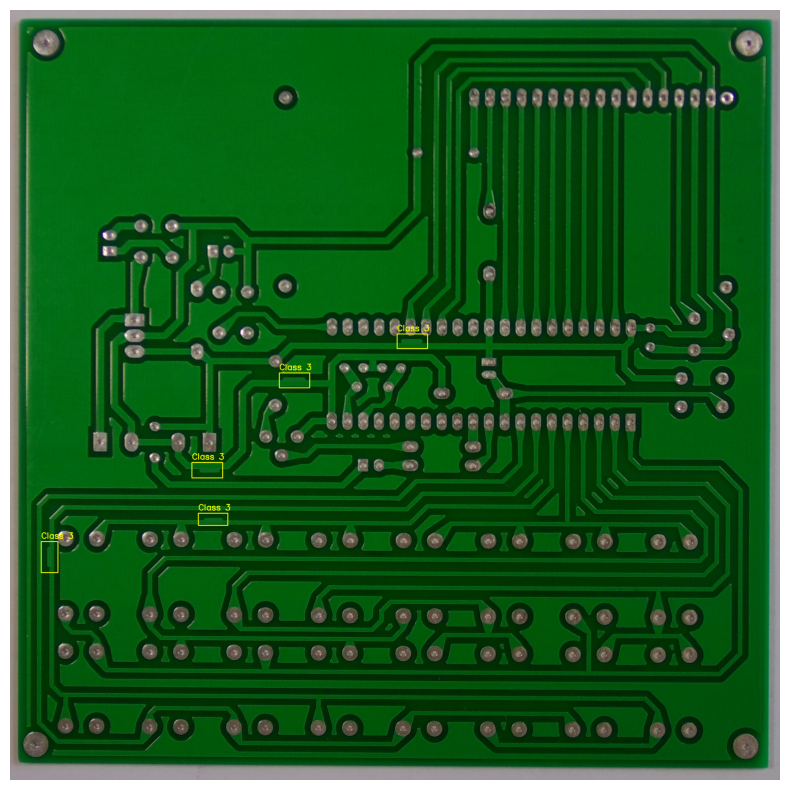

In [ ]:


# Define paths to images and annotation folder
image_folder = "/content/labels/"  # Folder where images are stored
label_folder = "/content/labels/"  # Folder where annotation .txt files are stored

# List all image files
image_files = [f for f in os.listdir(image_folder) if f.endswith('.jpg')]  # Adjust if using a different extension

# Function to parse YOLO annotation file
def parse_yolo_annotation(file_path, img_width, img_height):
    bboxes = []
    with open(file_path, 'r') as file:
        for line in file.readlines():
            parts = line.strip().split()
            class_id = int(parts[0])  # Class ID (0-5)
            x_center = float(parts[1]) * img_width
            y_center = float(parts[2]) * img_height
            width = float(parts[3]) * img_width
            height = float(parts[4]) * img_height

            # Convert YOLO format to corner-based (x1, y1, x2, y2)
            x1 = int(x_center - width / 2)
            y1 = int(y_center - height / 2)
            x2 = int(x_center + width / 2)
            y2 = int(y_center + height / 2)

            bboxes.append((x1, y1, x2, y2, class_id))  # Store bbox coordinates and class ID
    return bboxes

# Function to visualize bounding boxes on the image
def visualize_bboxes(image_file):
    img_path = os.path.join(image_folder, image_file)
    label_path = os.path.join(label_folder, image_file.replace('.jpg', '.txt'))  # Adjust extension if needed

    # Read the image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for matplotlib

    # Get image dimensions
    img_height, img_width, _ = img.shape
    print('height',img_height)
    print('width',img_width)

    # Parse the annotations (bounding boxes)
    bboxes = parse_yolo_annotation(label_path, img_width, img_height)

    # Colors for each class (you can customize this)
    colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0), (255, 0, 255), (0, 255, 255)]

    # Draw the bounding boxes
    for bbox in bboxes:
        x1, y1, x2, y2, class_id = bbox
        color = colors[class_id]  # Pick color based on class
        cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)  # Draw bbox with 2px thickness

        # Optionally, add class label text
        label = f"Class {class_id}"
        cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

    # Display the image with bounding boxes
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Visualize a specific image (you can change this to visualize others)
image_to_visualize = image_files[105]  # First image in the list
visualize_bboxes(image_to_visualize)


In [ ]:
!wget https://pjreddie.com/media/files/darknet53.conv.74


--2025-01-01 14:17:30--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  14.6MB/s    in 12s     

2025-01-01 14:17:42 (13.3 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [ ]:

!git clone https://github.com/AlexeyAB/darknet.git
%cd darknet
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile

!make


Cloning into 'darknet'...
remote: Enumerating objects: 15873, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 15873 (delta 3), reused 0 (delta 0), pack-reused 15863 (from 3)
Receiving objects: 100% (15873/15873), 14.47 MiB | 15.73 MiB/s, done.
Resolving deltas: 100% (10686/10686), done.
/content/darknet
mkdir -p ./obj/
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:945:23: warning: variable ‘rgb’ set but not used []

In [ ]:
!pip install opencv-python-headless


In [ ]:
!cd ~/darknet
!./darknet detector train /content/obj.data /content/yolov3_custom.cfg /content/darknet53.conv.74 -dont_show > /content/train.log
!grep "avg" /content/train.log

Streaming output truncated to the last 5000 lines.
 201: 6.427806, 8.527826 avg loss, 0.000002 rate, 0.877407 seconds, 1608 images, 2.412988 hours left
 202: 6.929625, 8.368006 avg loss, 0.000002 rate, 0.883705 seconds, 1616 images, 2.401043 hours left
 203: 8.542664, 8.385471 avg loss, 0.000002 rate, 0.911671 seconds, 1624 images, 2.389303 hours left
 204: 7.126417, 8.259566 avg loss, 0.000002 rate, 1.083307 seconds, 1632 images, 2.378066 hours left
 205: 7.199891, 8.153599 avg loss, 0.000002 rate, 1.124761 seconds, 1640 images, 2.369320 hours left
 206: 7.712014, 8.109440 avg loss, 0.000002 rate, 1.101723 seconds, 1648 images, 2.361234 hours left
 207: 7.994247, 8.097920 avg loss, 0.000002 rate, 1.098610 seconds, 1656 images, 2.352907 hours left
 208: 6.574356, 7.945564 avg loss, 0.000002 rate, 0.844610 seconds, 1664 images, 2.344616 hours left
 209: 6.812879, 7.832295 avg loss, 0.000002 rate, 0.908474 seconds, 1672 images, 2.332883 hours left
 210: 7.636742, 7.812740 avg loss, 0.000

In [ ]:
%%writefile /content/darknet/plotTrainLoss.py
import matplotlib.pyplot as plt
import sys

def parse_loss(log_file):
    loss_values = []
    with open(log_file, 'r') as file:
        for line in file:
            if "avg loss" in line:
                try:
                    loss = float(line.split("avg loss")[0].split()[-1])
                    loss_values.append(loss)
                except:
                    continue
    return loss_values

def plot_loss(loss_values):
    plt.figure(figsize=(10, 5))
    plt.plot(loss_values, label="Training Loss")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.title("YOLO Training Loss")
    plt.legend()
    plt.grid()
    plt.savefig("/content/training_loss_plot.png")  # Save the plot as an image
    plt.show()

if __name__ == "__main__":
    if len(sys.argv) != 2:
        print("Usage: python3 plotTrainLoss.py <train.log>")
        sys.exit(1)

    log_file = sys.argv[1]
    loss_values = parse_loss(log_file)
    plot_loss(loss_values)



Overwriting /content/darknet/plotTrainLoss.py


In [ ]:
import os
print(os.getcwd())

os.chdir('/content/darknet')  # Replace '/content/my_data' with your preferred path

/content/darknet


In [ ]:
!python3 /content/darknet/plotTrainLoss.py /content/train.log



Figure(1000x500)


In [ ]:
!./darknet detector test /content/obj.data /content/yolov3_custom.cfg /content/backup/yolov3_custom_final.weights -ext_output /content/pcb-defects/PCB_DATASET/images/Mouse_bite/01_mouse_bite_02.jpg


 CUDA-version: 12020 (12020), cuDNN: 8.9.6, GPU count: 1  
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  

# Use Retinanet for object ditection